In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sb

#wczytanie danych z pliku CSV
pd_data = pd.read_csv('pop_failures.csv')

In [23]:
#wyświetlenie pierwszych wierszy danych
pd_data.head()

Study  Run  vconst_corr   ...     bckgrnd_vdc_psim   Prandtl  outcome
0      1    1     0.859036   ...             0.796997  0.869893        0
1      1    2     0.606041   ...             0.438447  0.512256        1
2      1    3     0.997600   ...             0.285636  0.365858        1
3      1    4     0.783408   ...             0.699431  0.475987        1
4      1    5     0.406250   ...             0.280098  0.132283        1

[5 rows x 21 columns]

In [24]:
#wyodrębnienie danych wejściowych i rezultatu
target = np.array(pd_data["outcome"])
data = np.array(pd_data.iloc[:,2:-1].values)

In [28]:
#wyświetlenie rozmiaru danych
print("Wymiar danych wejściowych: ", data.shape)
print("Wymiar rezultatu: ", target.shape)

Wymiar danych wejściowych:  (540, 18)
Wymiar rezultatu:  (540,)


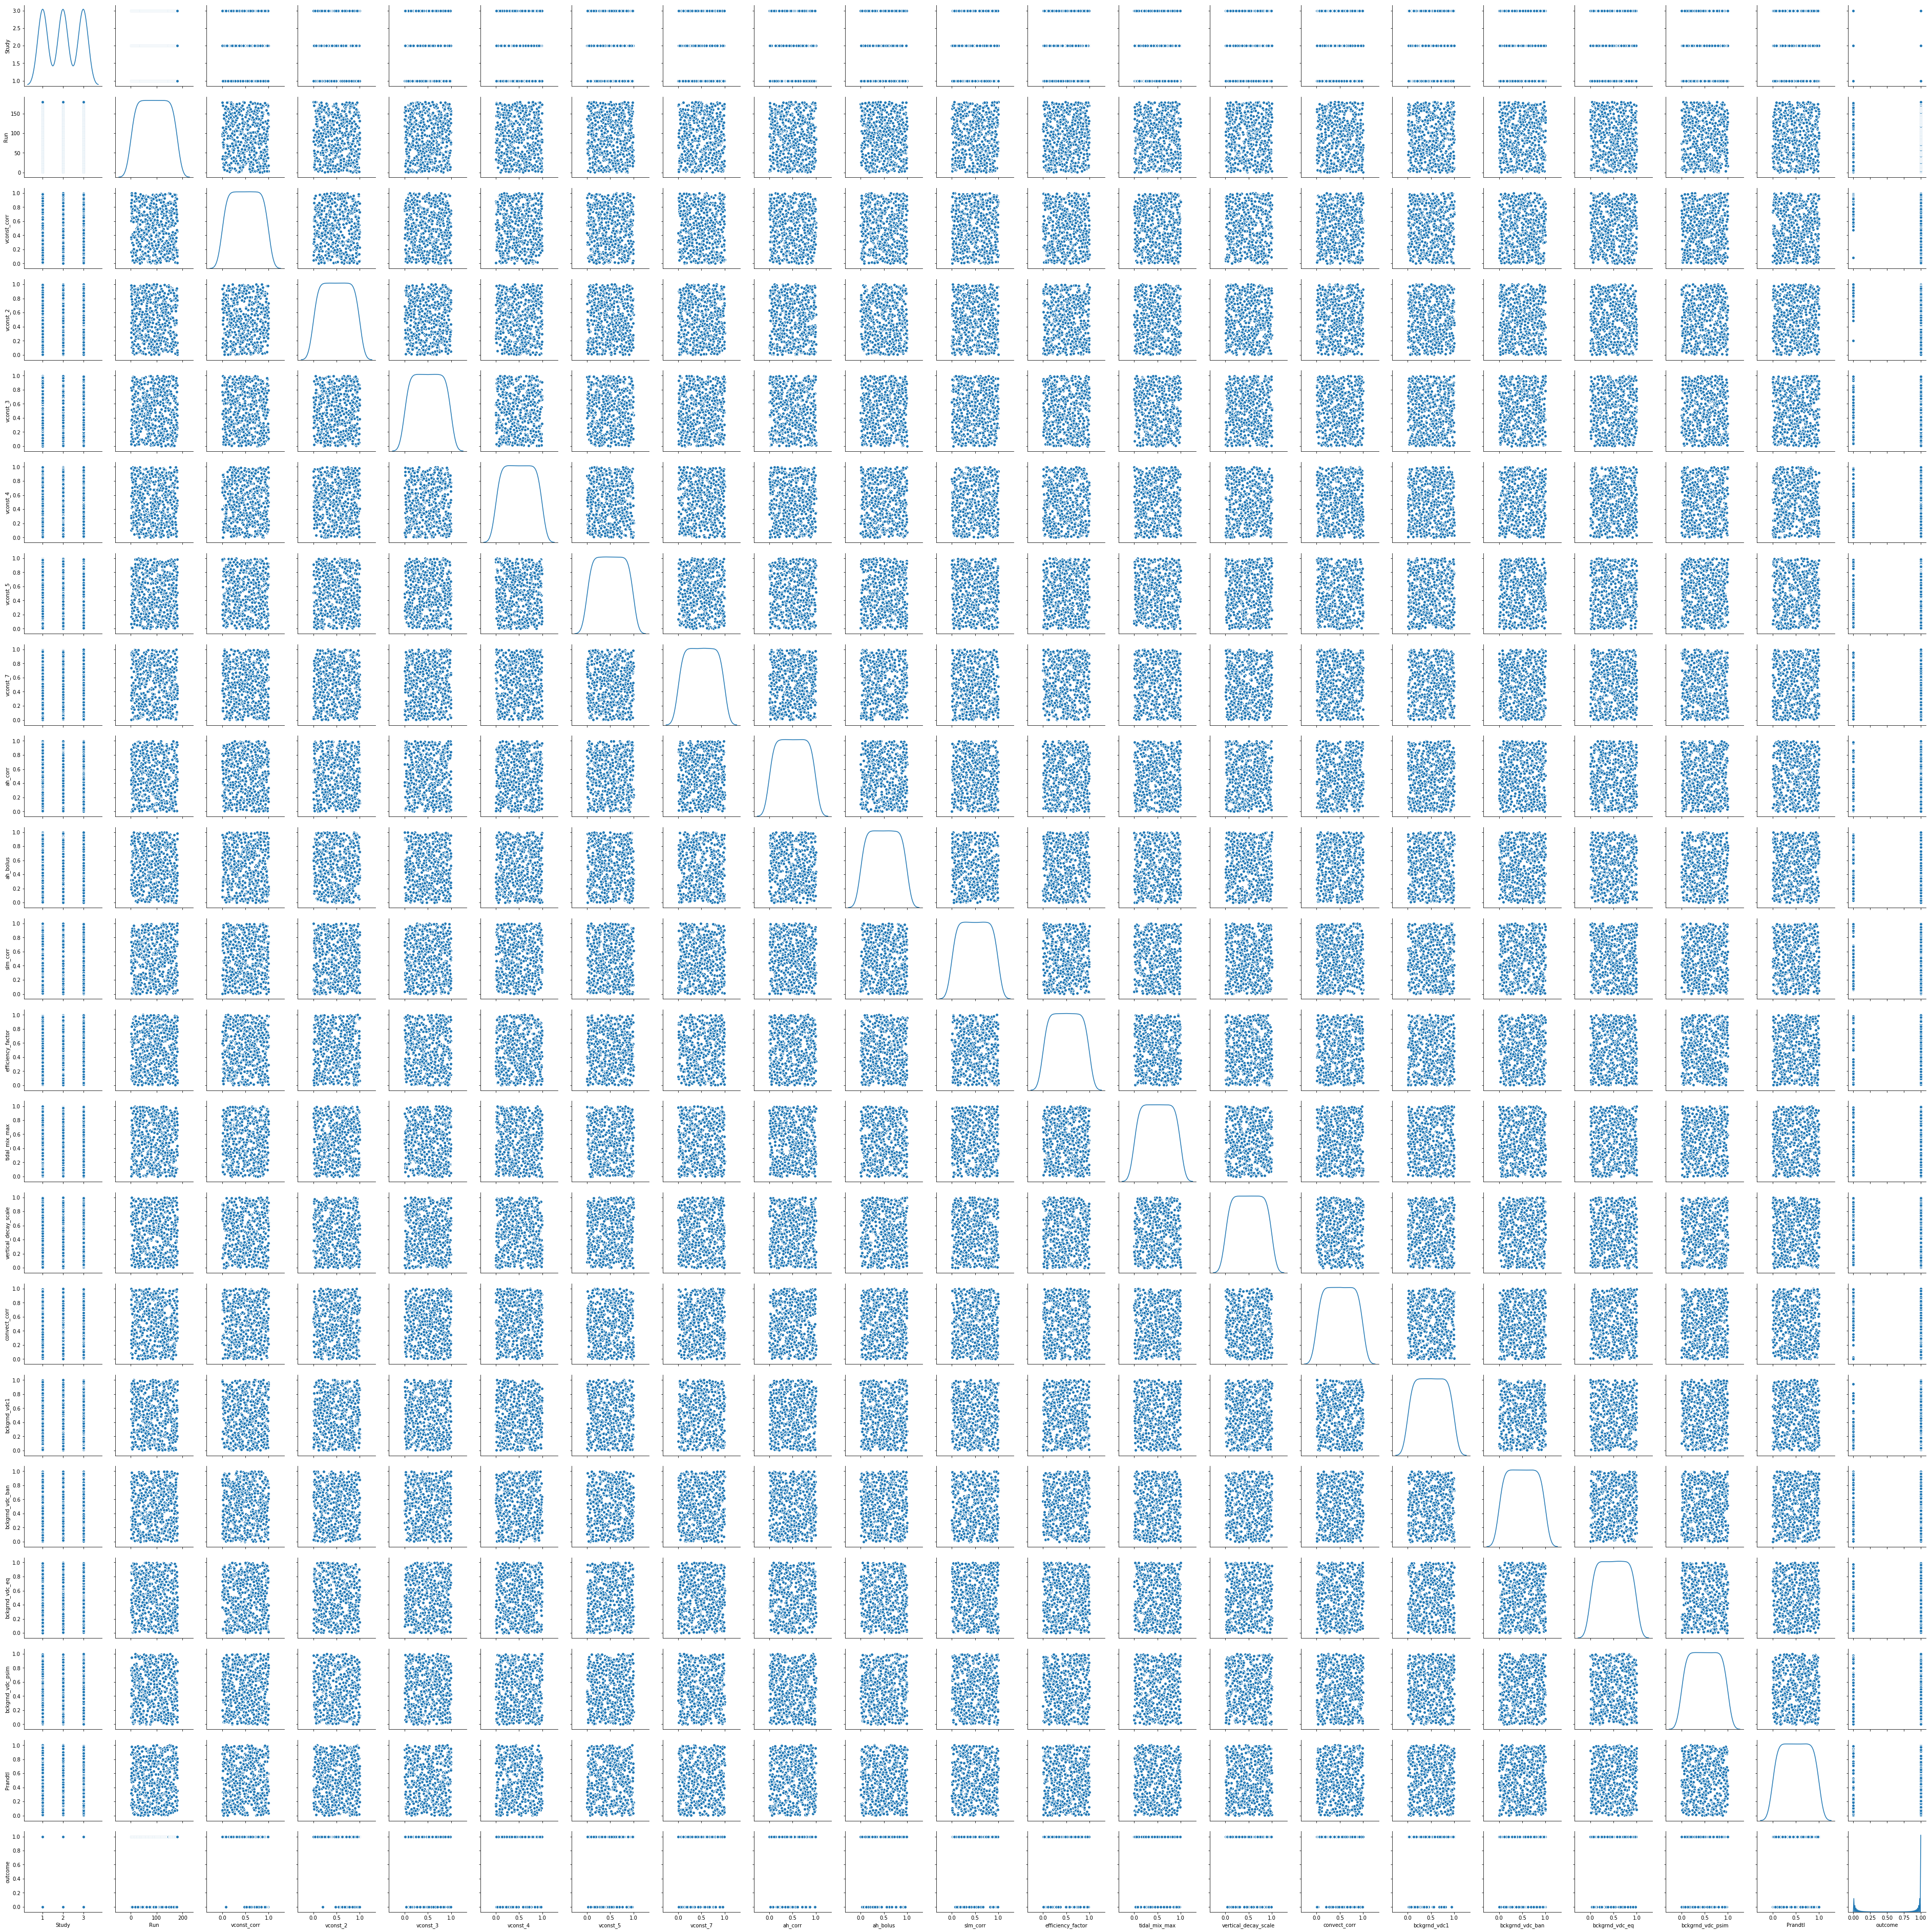

In [27]:
#wizualizacja danych
sb.pairplot(pd_data, diag_kind="kde")

In [30]:
#rozdzielenie danych na zbiory uczący i testowy
train_data, test_data, train_target, test_target = \
train_test_split(data,target, test_size=0.1, random_state=1)

In [44]:
#wyszukanie najoptymalniejszego modelu regresji logistycznej
logistic_regression_gs = GridSearchCV(
    LogisticRegression(),
    {
        "C": np.logspace(-3,3,7), 
        "penalty": ["l1","l2"],
        "max_iter": [100, 500, 1000],
        "tol": [1e-4, 1e-5, 1e-6]
    },
    cv=10)
logistic_regression_gs.fit(train_data,train_target)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'penalty': ['l1', 'l2'], 'max_iter': [100, 500, 1000], 'tol': [0.0001, 1e-05, 1e-06]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Najlepszy model został znaleziony dla parametrów {'C': 100.0, 'max_iter': 100, 'penalty': 'l2', 'tol': 0.0001} ze współczynnikiem determinacji: 0.9526748971193416


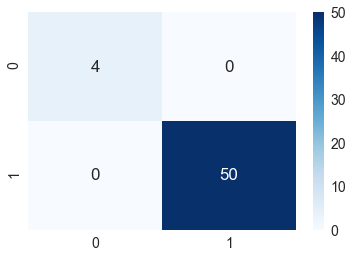

In [99]:
print("Najlepszy model został znaleziony dla parametrów", \ 
      logistic_regression_gs.best_params_, \
      "ze współczynnikiem determinacji:", \ 
      logistic_regression_gs.best_score_)

#matryca konfuzji dla wytrenowanego modelu
sb.heatmap(confusion_matrix(test_target, \
    logistic_regression_gs.predict(test_data)), \ 
        annot=True, cmap="Blues")

In [52]:
#ocena jakości modelu z zastosowaniem walidacji krzyżowej
cvs = [3, 5, 7, 10]
results = []
for cv in cvs:
    results.append( \
        cross_val_score(logistic_regression_gs, \ 
            data, target, cv=cv))

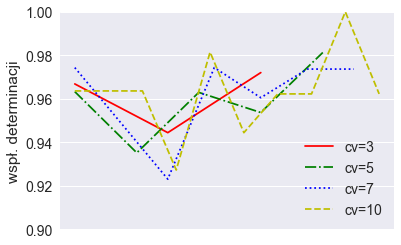

In [100]:
#wyświetlenie wyniku walidacji krzyżowej
markers = ['r-', 'g-.', 'b:', 'y--']
for i in range(4):
    plt.plot([x / (cvs[i]+1) for x in range(cvs[i])], \
        results[i], markers[i], label='cv='+str(cvs[i]))
plt.legend()
plt.ylim(0.9, 1)
plt.gca().xaxis.set_visible(False)
plt.ylabel('wspł. determinacji')
plt.show()